In [1]:
#Reading and manipulating data
import numpy as np
import pandas as pd
# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)
# to split the data into train and test
from sklearn.model_selection import train_test_split
# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

In [2]:
file_id = "1kRIRHwesFXCaa8gyCZdTfQ8kr7JHbV76"
data = pd.read_csv(f"https://drive.google.com/uc?export=download&id={file_id}")

data.head()
data.columns

data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,23.97,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,86.96
1,Honor,Android,28.10,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,161.49
2,Honor,Android,24.29,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,268.55
3,Honor,Android,26.04,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,180.23
4,Honor,Android,15.72,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,103.80


In [3]:
data.shape

(3571, 15)

In [4]:
data.info

<bound method DataFrame.info of      brand_name       os  screen_size   4g   5g  main_camera_mp  \
0         Honor  Android        23.97  yes   no            13.0   
1         Honor  Android        28.10  yes  yes            13.0   
2         Honor  Android        24.29  yes  yes            13.0   
3         Honor  Android        26.04  yes  yes            13.0   
4         Honor  Android        15.72  yes   no            13.0   
...         ...      ...          ...  ...  ...             ...   
3566       Asus  Android        15.88  yes   no             NaN   
3567       Asus  Android        15.24  yes   no            13.0   
3568    Alcatel  Android        18.73  yes   no            13.0   
3569    Alcatel  Android        18.73  yes   no            13.0   
3570    Alcatel  Android        13.49  yes   no            13.0   

      selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0                  5.0        64.0  3.0   3020.0   146.0          2020   
1              

In [5]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3571,34,Others,509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3571,4,Android,3246,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3571.0,NaN,NaN,NaN,14.803892,5.153092,2.7,12.7,13.49,16.51,46.36
4g,3571,2,yes,2359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3571,2,no,3419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3391.0,NaN,NaN,NaN,9.400454,4.818396,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3569.0,NaN,NaN,NaN,6.547352,6.879359,0.3,2.0,5.0,8.0,32.0
int_memory,3561.0,NaN,NaN,NaN,54.532607,84.696246,0.005,16.0,32.0,64.0,1024.0
ram,3561.0,NaN,NaN,NaN,4.056962,1.391844,0.03,4.0,4.0,4.0,16.0
battery,3565.0,NaN,NaN,NaN,3067.225666,1364.206665,80.0,2100.0,3000.0,4000.0,12000.0


In [6]:
df=data.copy()

EDA(Exploratory Data Analysis)

In [7]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [8]:


def labeled_barplot(data, feature, perc=False, n=None):
    

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

Distribution of used and new phone prices

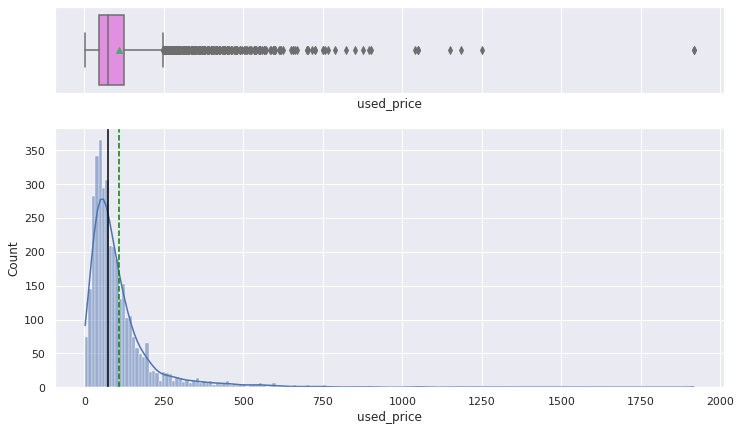

In [9]:
histogram_boxplot(df, "used_price", kde=True)

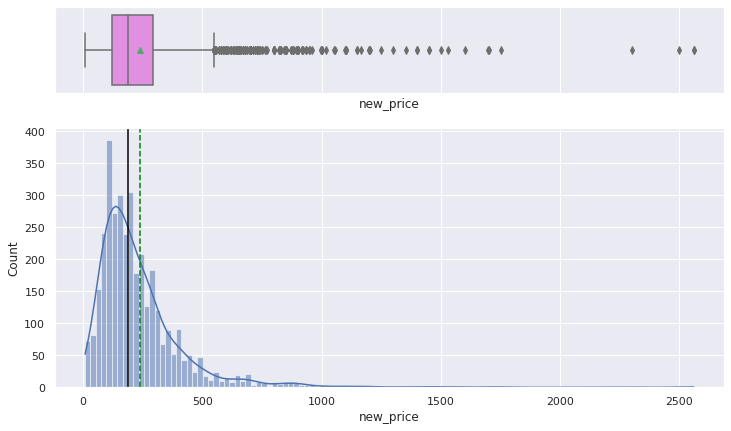

In [10]:
histogram_boxplot(df, "new_price", kde=True)

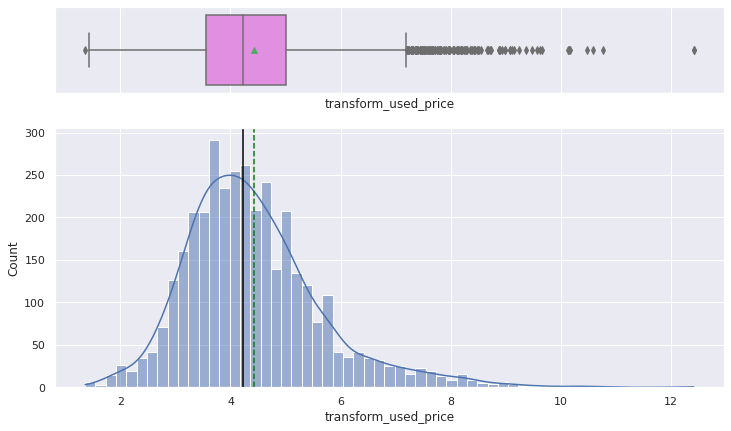

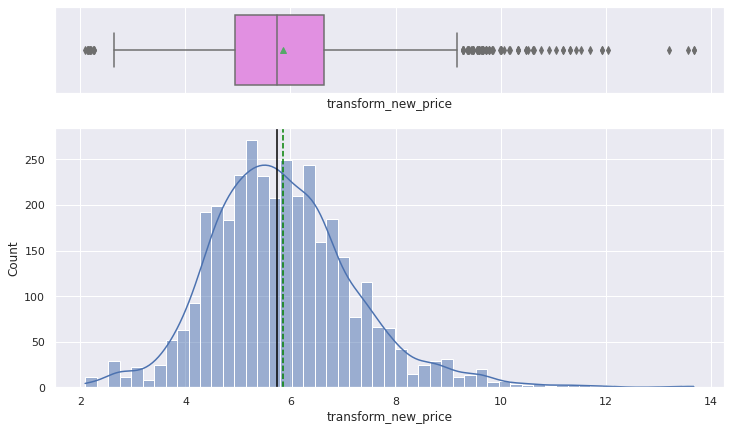

In [11]:
# transforming the data to improve visualization
# model was run with no transformation , sqrt() transformation, cbrt() transformation and log transformation
# to evaluate model performance, and assumptions - residuals vs fitted plot, homoscedasticity check etc
# cbrt() transformation outlined below

df["transform_used_price"] = np.cbrt(df["used_price"])
histogram_boxplot(df, "transform_used_price", kde=True)
plt.show()

df["transform_new_price"] = np.cbrt(df["new_price"])
histogram_boxplot(df, "transform_new_price", kde=True)

The cbrt plot of used_price and new_price appears to follow a normal distribution, and data is much easier to visualize and interpret

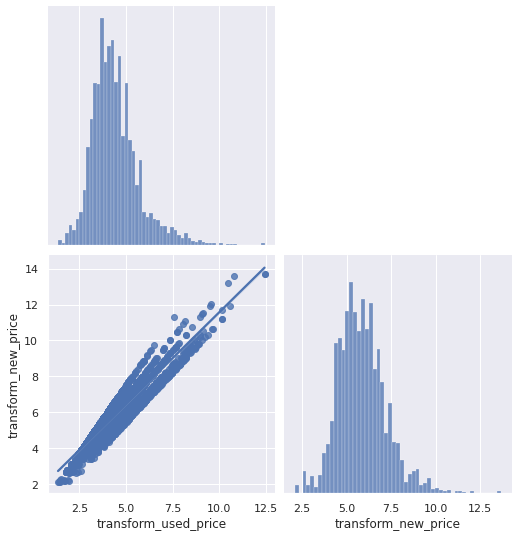

Linear correlation factor between cbrt(used_price) and cbrt(new_price) 0.93
Linear correlation factor between used_price and new_price 0.93


In [12]:
g = sns.pairplot(data = df[["transform_used_price","transform_new_price"]], corner=True, kind="reg")
g.fig.set_size_inches(8,8)
plt.show()
print("Linear correlation factor between cbrt(used_price) and cbrt(new_price)", \
      round(df.corr()["transform_used_price"]["transform_new_price"] , 2))
print("Linear correlation factor between used_price and new_price", \
      round(df.corr()["used_price"]["new_price"] , 2))

The linear corrleation between the transformmed columns - cbrt(used_price) and cbrt(new_price) is same as before transformation; strongly positively correlated with correlation factor 0.93

Distribution of operating systems

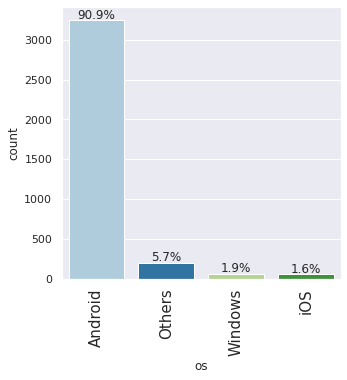

In [13]:
labeled_barplot(df, "os", perc=True)

In [14]:
# since android is clearly dominating the os market, we can group others, windows and iOS together 
# as a category- "not_Android"

df.loc[df.os=="Others", "os"] = "not_Android"
df.loc[df.os=="Windows", "os"] = "not_Android"
df.loc[df.os=="iOS", "os"] = "not_Android"

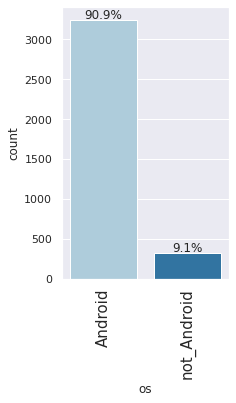

In [15]:
labeled_barplot(df, "os", perc=True)

Distribution of Ram by different brands

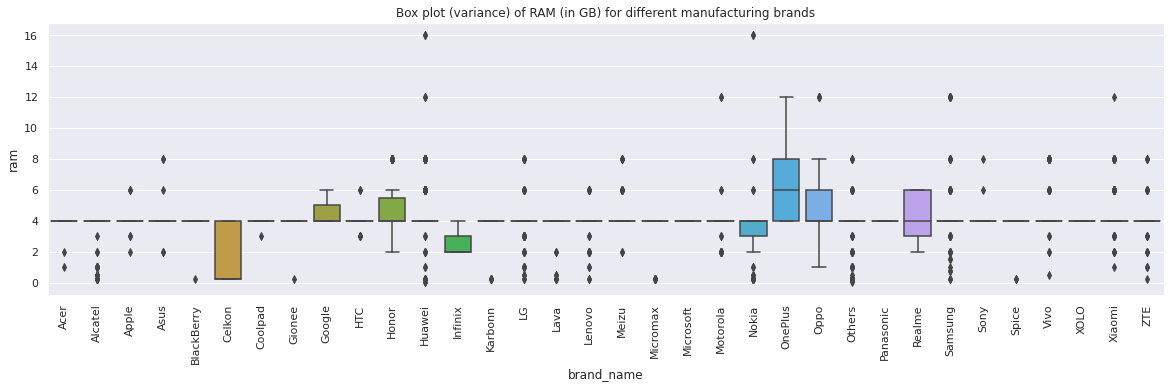

In [16]:
plt.figure(figsize=(20,5))

sns.boxplot(data = df.sort_values("brand_name", ascending=True), x = "brand_name", y="ram");
plt.xticks(rotation=90)
plt.title("Box plot (variance) of RAM (in GB) for different manufacturing brands")
plt.show()

The minimun, 25%, 50%, 75% and maximum RAM (in GB) for several manufacturing brands are the same i.e. 4GB indicating little variance (spread), or absence of a defined "box"plot. However, there are still outliers present (very high or very low RAM (in GB))

Distribution of phones with large screen size (>6 inches)

In [17]:
#6 inches = 6*2.54cm = 15.24cm
df_largescreen = df[df["screen_size"]>15.24]
print(df_largescreen.shape)

(1235, 17)


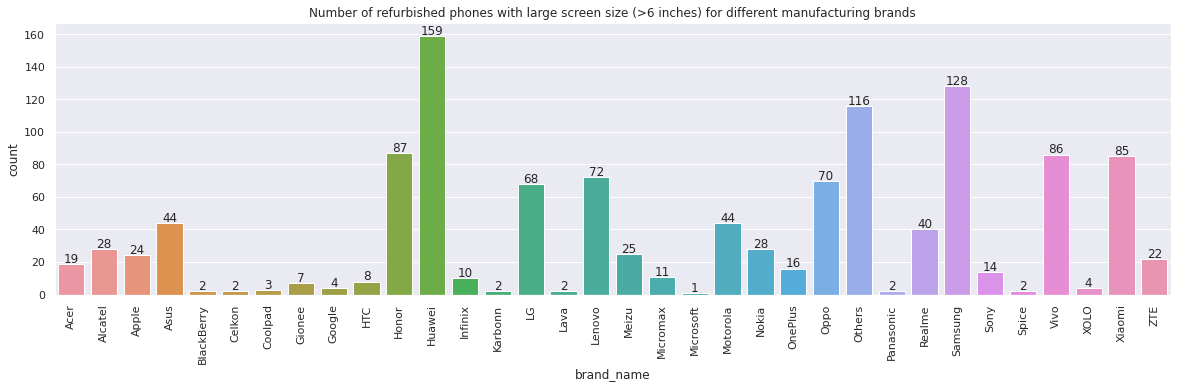

In [18]:
plt.figure(figsize=(20,5))

ax = sns.countplot(data = df_largescreen.sort_values("brand_name", ascending=True), x = "brand_name");
plt.xticks(rotation=90)
plt.title("Number of refurbished phones with large screen size (>6 inches) for different manufacturing brands")
for p in ax.patches:
    label = p.get_height()
    x = p.get_x() + p.get_width() / 2 
    y = p.get_height() 
    ax.annotate(label,(x, y),ha="center",va="center",size=12,xytext=(0, 5),textcoords="offset points",)  
plt.show()

Distributions of phones with great selfie camera (>8MP)

In [19]:
df_greatselfiecamera = df[df["selfie_camera_mp"]>8]
print(df_greatselfiecamera.shape)

(666, 17)


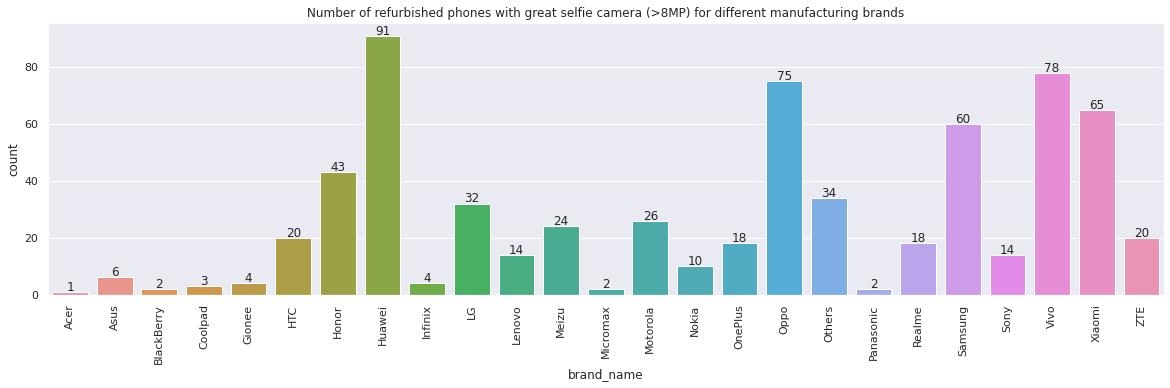

In [20]:
plt.figure(figsize=(20,5))

ax = sns.countplot(data = df_greatselfiecamera.sort_values("brand_name", ascending=True), x = "brand_name");
plt.xticks(rotation=90)
plt.title("Number of refurbished phones with great selfie camera (>8MP) for different manufacturing brands")
for p in ax.patches:
    label = p.get_height()
    x = p.get_x() + p.get_width() / 2 
    y = p.get_height() 
    ax.annotate(label,(x, y),ha="center",va="center",size=12,xytext=(0, 5),textcoords="offset points",)  
plt.show()

In [21]:

 

df.groupby("brand_name").mean()["new_price"].sort_values()

brand_name
Celkon         60.956486
Spice          98.000000
Infinix       106.017000
Micromax      106.964667
Lava          107.424722
Karbonn       110.384333
Nokia         130.600802
XOLO          130.898571
Alcatel       142.499092
Microsoft     166.366818
Panasonic     171.426596
Acer          172.867647
Realme        186.031415
Others        191.112094
Lenovo        193.358779
Coolpad       194.285455
Motorola      209.448464
ZTE           216.800922
BlackBerry    234.774545
Honor         235.897915
LG            242.218203
HTC           249.853818
Asus          250.998766
Gionee        255.379286
Xiaomi        257.326422
Meizu         269.569242
Sony          280.829676
Samsung       293.854500
Vivo          320.268355
Huawei        323.960091
Oppo          341.912481
Google        474.716667
OnePlus       558.230818
Apple         639.004941
Name: new_price, dtype: float64

In [22]:
df.loc[df.new_price>0, "brand_name"] = "low_range"
df.loc[df.new_price>=150, "brand_name"] = "mid_range"
df.loc[df.new_price>=250, "brand_name"] = "high_range"

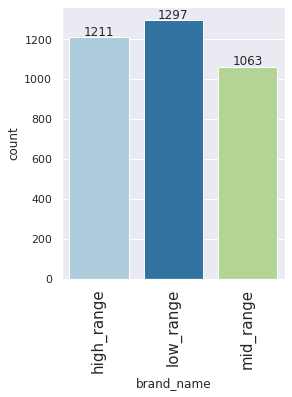

In [23]:
labeled_barplot(df, "brand_name")

Relation between a phone's weight and battery for phone offering large batteries (more than 4500 mAh)

In [24]:
df_largebatteries = df[df["battery"]>4500]
print(df_largebatteries.shape)

(346, 17)


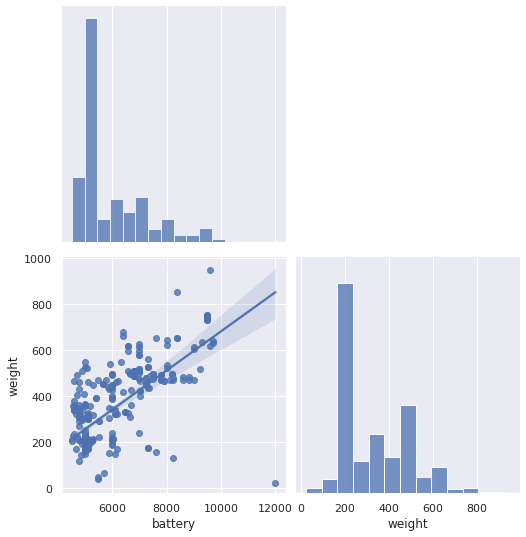

Linear correlation factor between phone's weight and battery 0.7


In [25]:
g = sns.pairplot(data = df_largebatteries[["battery","weight"]], corner=True, kind="reg")
g.fig.set_size_inches(8,8)
plt.show()
print("Linear correlation factor between phone's weight and battery", \
      round(df_largebatteries.corr()["weight"]["battery"] , 2))

we see moderate correlation ,it means as the battery increasess so the weight

Linear correlation between numerical attributes and used phone price

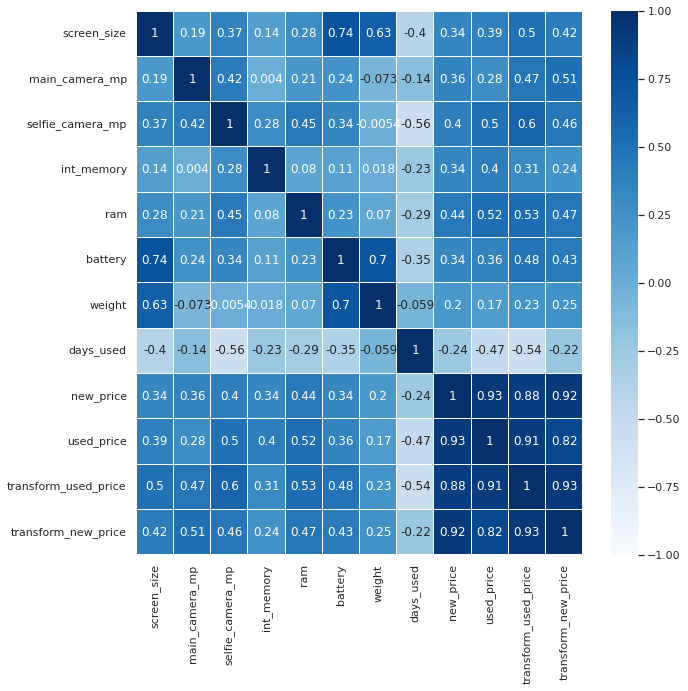

In [26]:
numeric_columns = df.select_dtypes(include=np.number).columns.to_list()
numeric_columns.remove("release_year") #as it is a temporal variable

plt.figure(figsize=(10,10))
sns.heatmap(df[numeric_columns].corr(), annot=True, vmin=-1, vmax=1, cmap="Blues", linewidths=0.05);

For our modeling, we will use cbrt(used_price) and cbrt(new_price)

In [27]:
df.drop("used_price", axis=1, inplace=True)
df.drop("new_price", axis=1, inplace=True)

Treat Missing Values

In [28]:
# def plot_compare(sinceredff, insinceredff, columnn1, columnn2, space, n):
#     fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    
#     chart1 = sns.barplot(x=columnn1, y=columnn2, data=sinceredff, ax=ax[0], color="deepskyblue")
#     chart2 = sns.barplot(x=columnn1, y=columnn2, data=insinceredff, ax=ax[1], color="darkorange")

#     ax[0].set_ylabel('Word count', size=14)
#     ax[0].set_xlabel('Words', size=14)
#     ax[0].set_title(f'Top {n} Words in Sincere Questions', size=14)

#     ax[1].set_ylabel('Word count', size=14)
#     ax[1].set_xlabel('Words', size=14)
#     ax[1].set_title(f'Top {n} Words in Insincere Questions', size=14)

#     chart1.set_xticklabels(
#     chart1.get_xticklabels(), 
#     rotation=45, 
#     horizontalalignment='right',
#     fontweight='light',
#     fontsize='x-large')
#     fig.subplots_adjust(wspace=space)

#     chart2.set_xticklabels(
#     chart2.get_xticklabels(), 
#     rotation=45, 
#     horizontalalignment='right',
#     fontweight='light',
#     fontsize='x-large')
#     fig.subplots_adjust(wspace=space)
#     plt.show()

# def gett_df__ngram(texts, n=1):
#   frequency = defaultdict(int)

#   for text in texts:
#     tokenized = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
#     n_grams = ngrams(tokenized, n)
#     for words in n_grams:
#       filter(None, words)
#       words = ' '.join(words)
#       frequency[words] += 1
      
#   df = pd.DataFrame(sorted(frequency.items(), key=lambda x: x[1])[::-1])
#   df.columns = ['word', 'wordcount']
#   return df

In [29]:
df.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp          180
selfie_camera_mp          2
int_memory               10
ram                      10
battery                   6
weight                    7
release_year              0
days_used                 0
transform_used_price      0
transform_new_price       0
dtype: int64

The dependent variable cbrt(used_price) does not have any missing values

In [30]:
medianFiller = lambda x:x.fillna(x.median())

brand_names = df["brand_name"].unique()
numeric_column = df.select_dtypes(include = np.number).columns.to_list()

# we will group by brand name (low-range, mid-range or high-range), and for each numeric column, we will replace 
# the missing value with the median value of the numeric column of the respective brand name 

for item in brand_names:
    df.loc[df.brand_name==item, numeric_column] = \
    df.loc[df.brand_name==item, numeric_column].apply(medianFiller, axis=0)

In [31]:
df.isnull().sum()

brand_name              0
os                      0
screen_size             0
4g                      0
5g                      0
main_camera_mp          0
selfie_camera_mp        0
int_memory              0
ram                     0
battery                 0
weight                  0
release_year            0
days_used               0
transform_used_price    0
transform_new_price     0
dtype: int64

All missing values have been treated

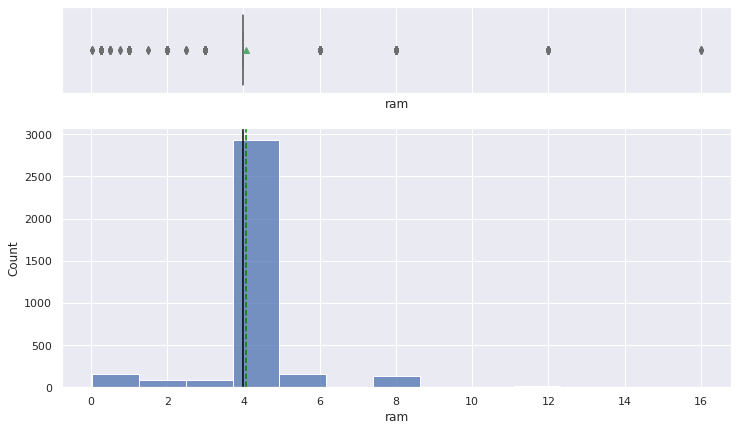

In [32]:
histogram_boxplot(df, "ram")

we will drop ram column has majority has constant ram of 4gb

In [33]:
df.drop("ram", axis=1, inplace=True)
numeric_columns.remove("ram")
numeric_columns.remove("new_price")
numeric_columns.remove("used_price")

Outlier treatment

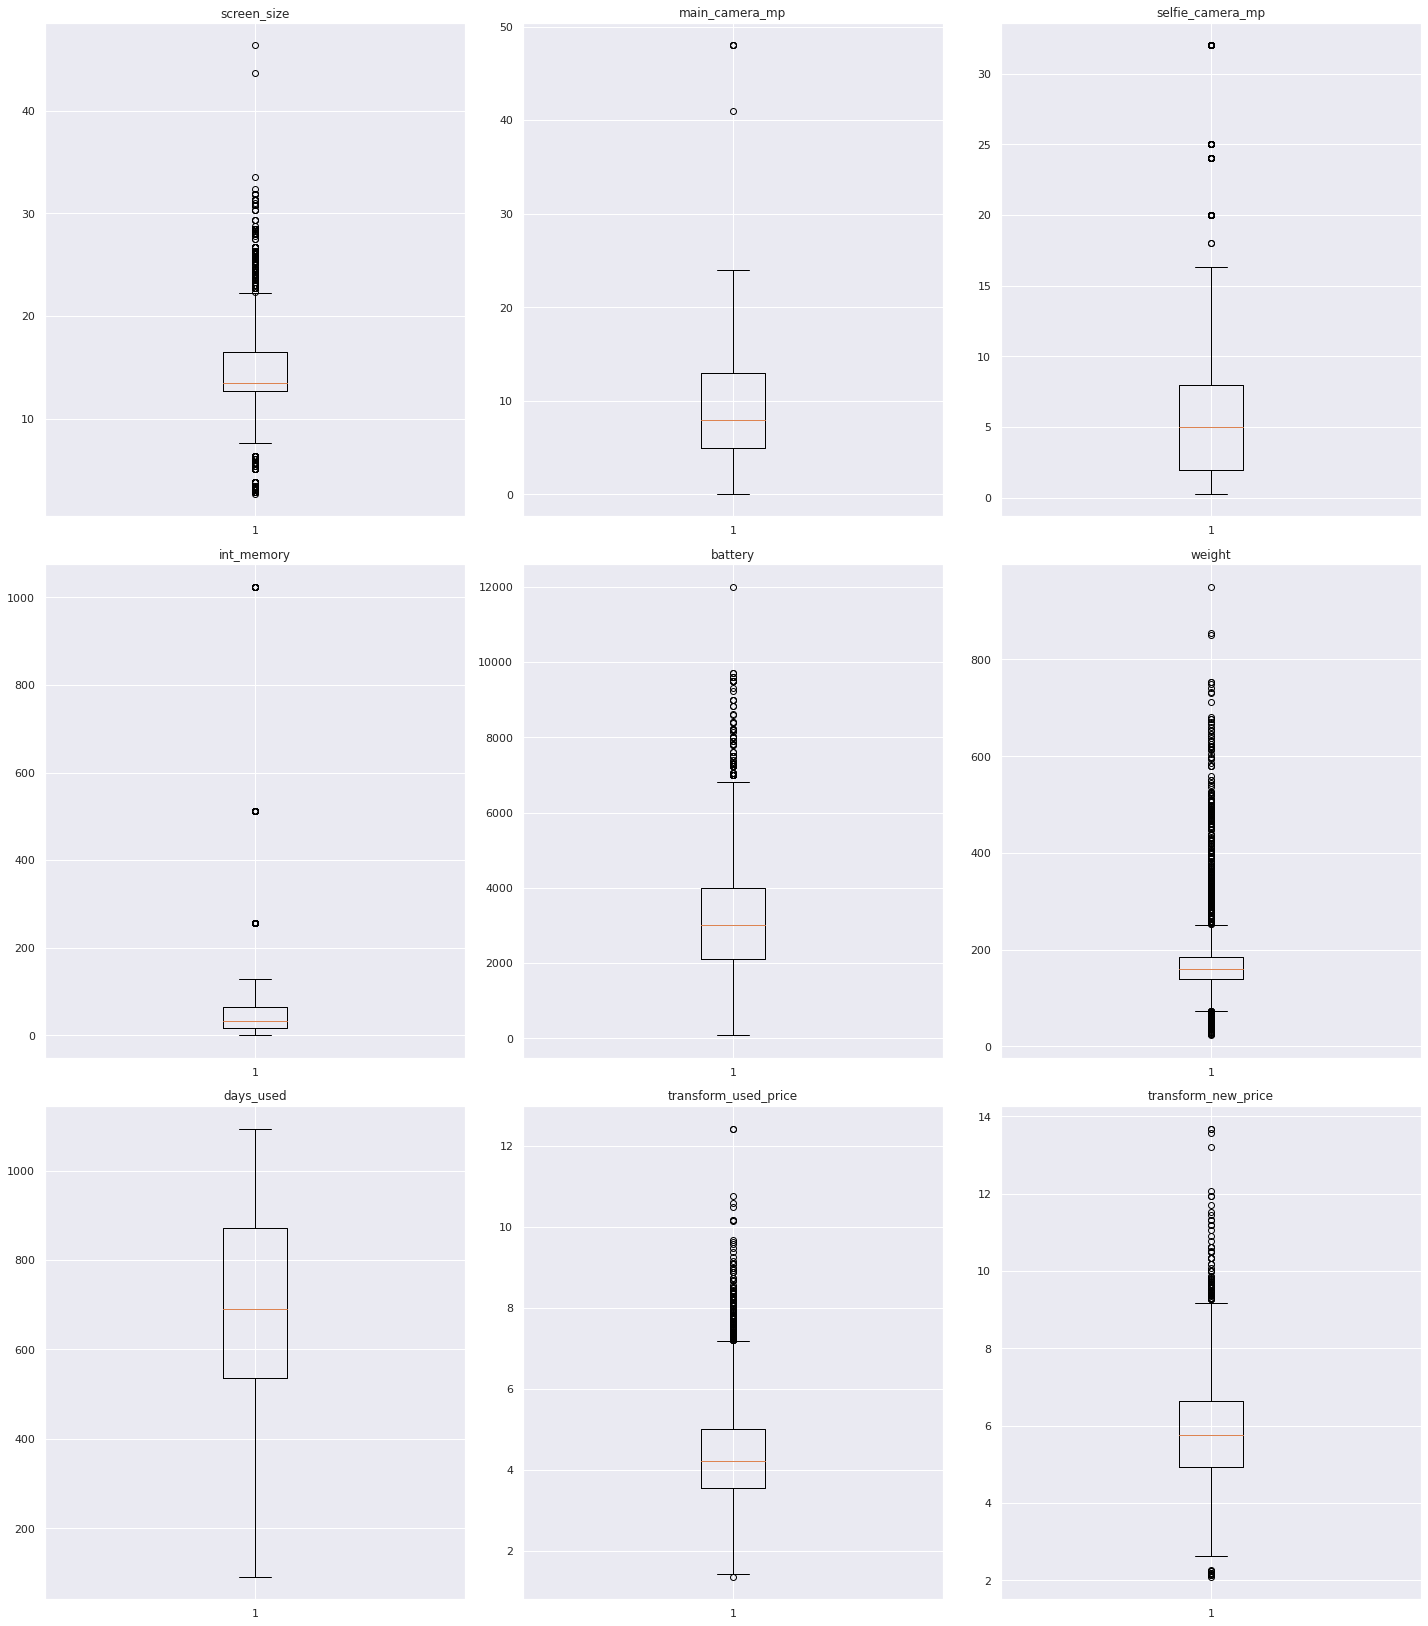

In [34]:
# let's plot the boxplots of all columns to check for outliers

plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4,3, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [35]:
# We will perform flooring and capping to remove these outliers and build our model
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [36]:
# treating the outliers
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df, numerical_col)

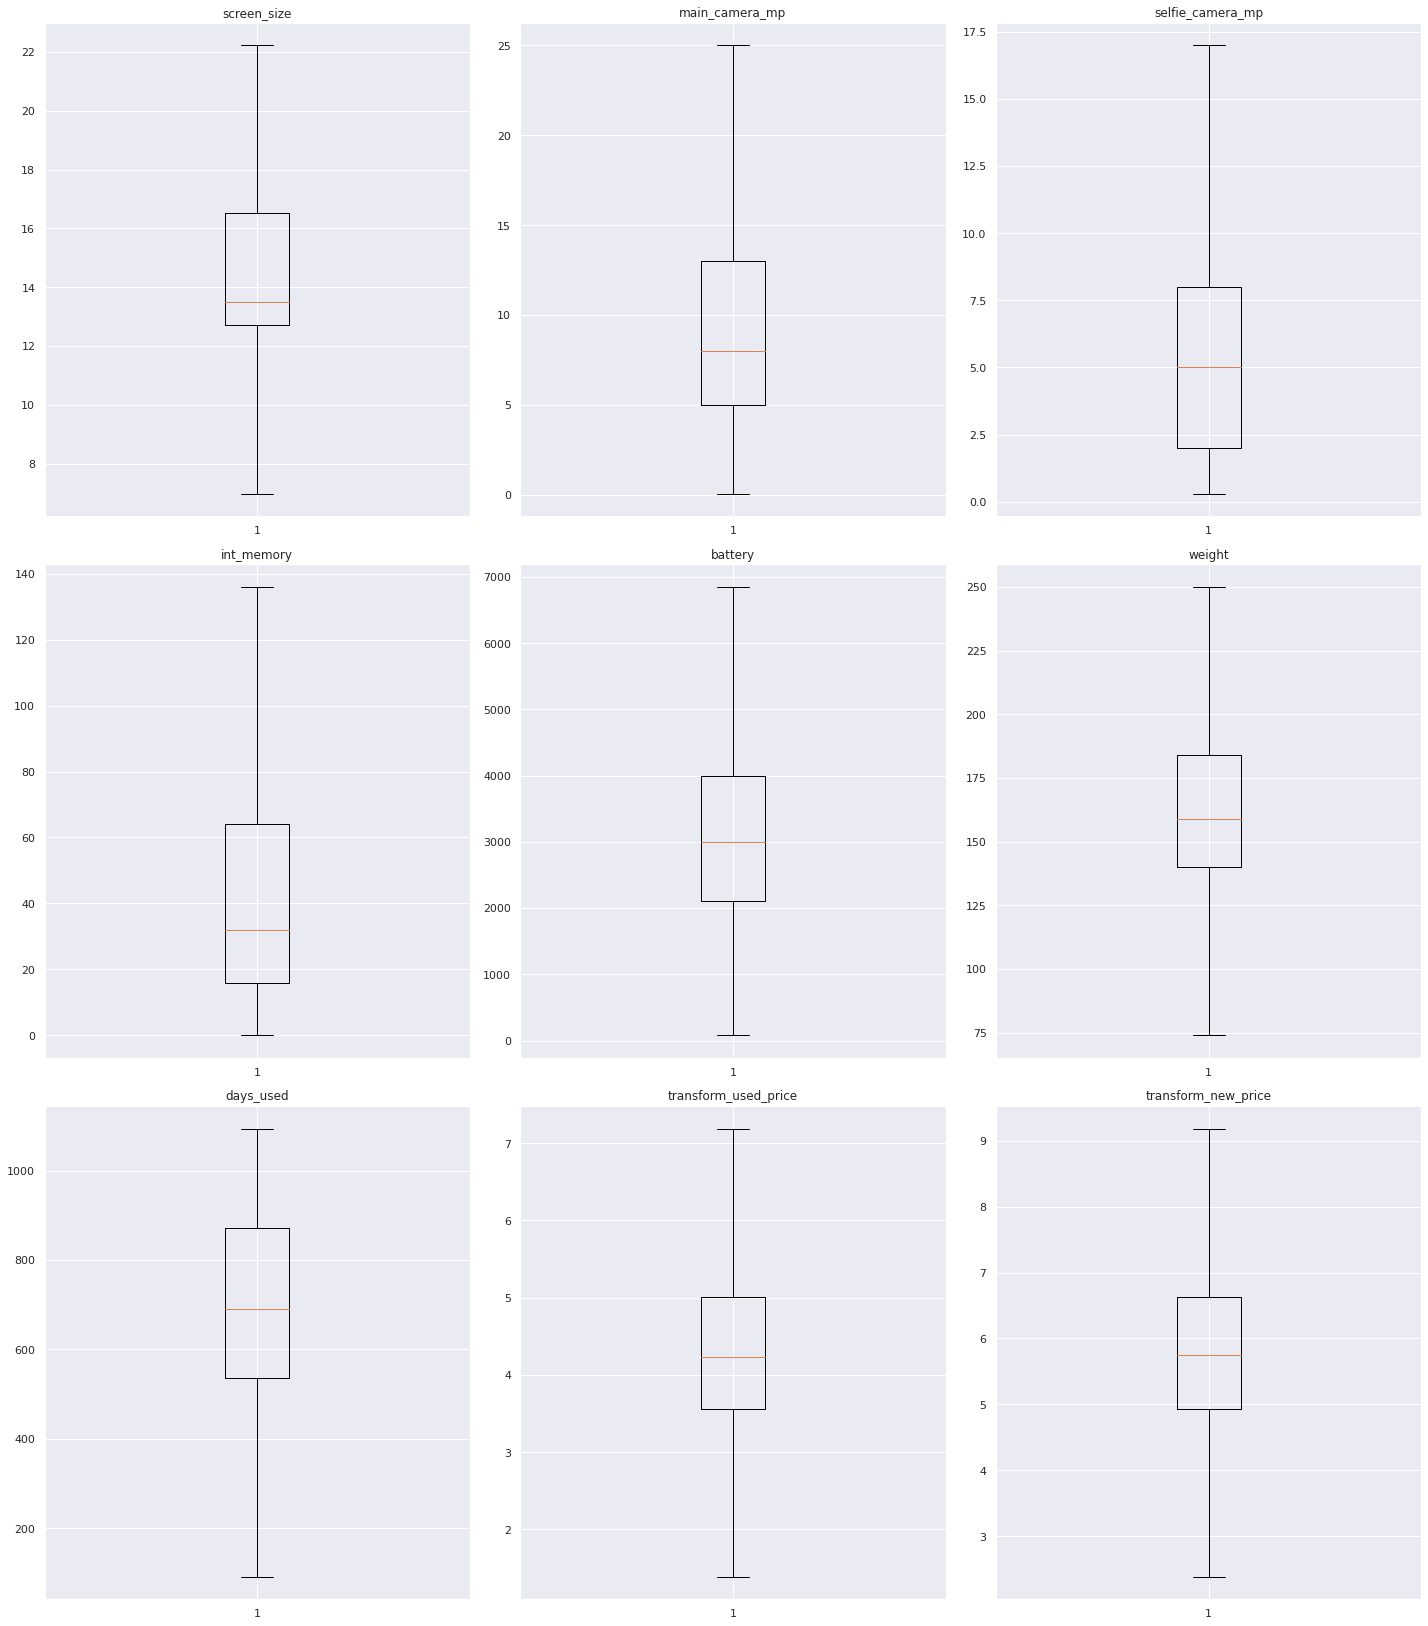

In [37]:
# let's look at the boxplots to see if the outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 3, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

All outliers have been treated

Reanalyzing distribution of phones with large screen size (>6 inches), phones with great selfie camera (>8MP), offered by different manufacturing brands

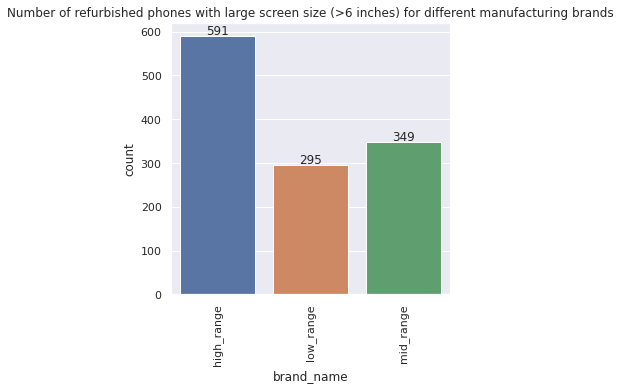

In [38]:
#6 inches = 6*2.54cm = 15.24cm
df_largescreen = df[df["screen_size"]>15.24]

plt.figure(figsize=(5,5))

ax = sns.countplot(data = df_largescreen.sort_values("brand_name", ascending=True), x = "brand_name");
plt.xticks(rotation=90)
plt.title("Number of refurbished phones with large screen size (>6 inches) for different manufacturing brands")
for p in ax.patches:
    label = p.get_height()
    x = p.get_x() + p.get_width() / 2 
    y = p.get_height() 
    ax.annotate(label,(x, y),ha="center",va="center",size=12,xytext=(0, 5),textcoords="offset points",)  
plt.show()

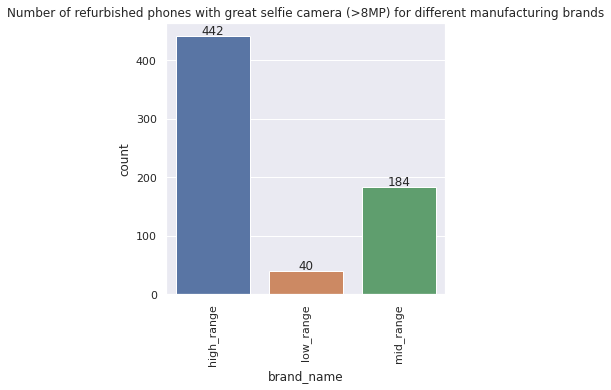

In [39]:
df_greatselfiecamera = df[df["selfie_camera_mp"]>8]

plt.figure(figsize=(5,5))

ax = sns.countplot(data = df_greatselfiecamera.sort_values("brand_name", ascending=True), x = "brand_name");
plt.xticks(rotation=90)
plt.title("Number of refurbished phones with great selfie camera (>8MP) for different manufacturing brands")
for p in ax.patches:
    label = p.get_height()
    x = p.get_x() + p.get_width() / 2 
    y = p.get_height() 
    ax.annotate(label,(x, y),ha="center",va="center",size=12,xytext=(0, 5),textcoords="offset points",)  
plt.show()

Reanalyzing the relation between a phone's weight and battery for phone offering large batteries (more than 4500 mAh)

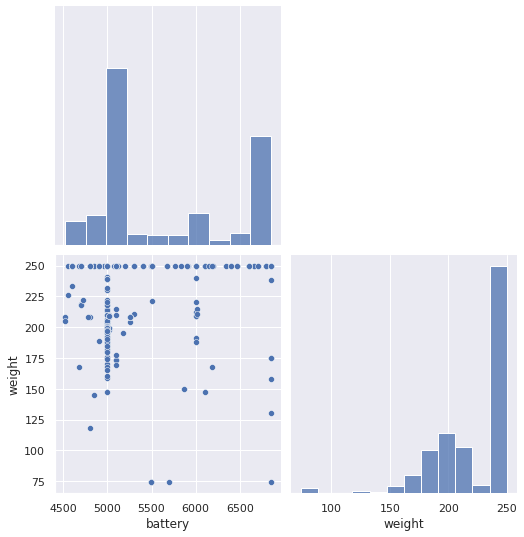

Linear correlation factor between phone's weight and battery 0.4


In [40]:
df_largebatteries = df[df["battery"]>4500]

g = sns.pairplot(data = df_largebatteries[["battery","weight"]], corner=True)
g.fig.set_size_inches(8,8)
plt.show()
print("Linear correlation factor between phone's weight and battery", \
      round(df_largebatteries.corr()["weight"]["battery"] , 2))

The linear correlation between a phone's weight and battery has dropped from 0.7 to 0.4 after outlier treatment, i.e., has become weaker

Reanalyzing linear correlation between numerical attributes and used phone price

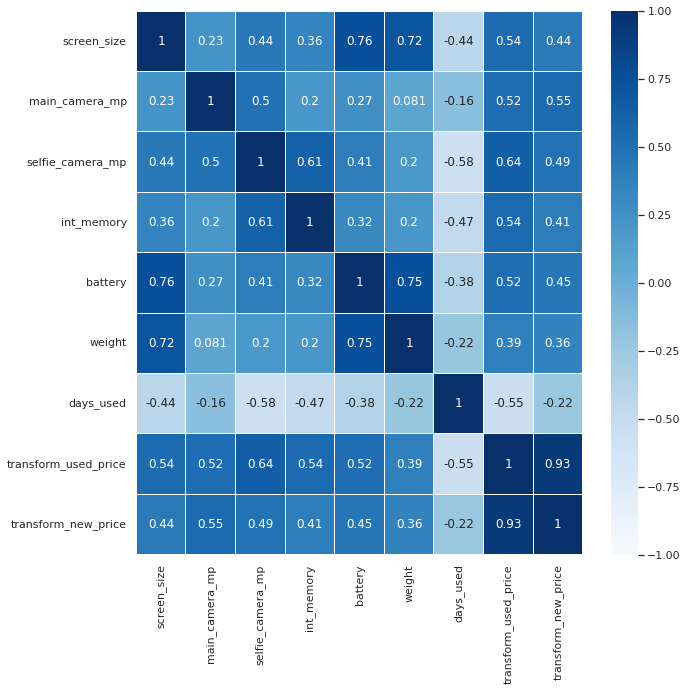

In [41]:
numeric_columns = df.select_dtypes(include=np.number).columns.to_list()
numeric_columns.remove("release_year") #as it is a temporal variable

plt.figure(figsize=(10,10))
sns.heatmap(df[numeric_columns].corr(), annot=True, vmin=-1, vmax=1, cmap="Blues", linewidths=0.05);

Linear Model Building

In [42]:
# defining X and y variables
X = df.drop(["transform_used_price", "release_year"], axis=1) # since year is a temporal variable
y = df["transform_used_price"]

print(X.head())
print(y.head())


   brand_name       os  screen_size   4g   5g  main_camera_mp  \
0   low_range  Android       22.225  yes   no            13.0   
1   mid_range  Android       22.225  yes  yes            13.0   
2  high_range  Android       22.225  yes  yes            13.0   
3  high_range  Android       22.225  yes  yes            13.0   
4   low_range  Android       15.720  yes   no            13.0   

   selfie_camera_mp  int_memory  battery  weight  days_used  \
0               5.0        64.0   3020.0   146.0        127   
1              16.0       128.0   4300.0   213.0        325   
2               8.0       128.0   4200.0   213.0        162   
3               8.0        64.0   6850.0   250.0        345   
4               8.0        64.0   5000.0   185.0        293   

   transform_new_price  
0             4.814827  
1             6.294477  
2             7.110294  
3             6.533789  
4             5.203228  
0    4.430368
1    5.445635
2    6.451713
3    5.648620
4    4.699653
Name: tran

In [43]:
# encoding categorical variables

X = pd.get_dummies(X, columns=X.select_dtypes(include=["object","category"]).columns.to_list(), \
    drop_first=True)

print(X.shape)
X.head()

(3571, 13)


,screen_size,main_camera_mp,selfie_camera_mp,int_memory,battery,weight,days_used,transform_new_price,brand_name_low_range,brand_name_mid_range,os_not_Android,4g_yes,5g_yes
0,22.225,13.0,5.0,64.0,3020.0,146.0,127,4.814827,1,0,0,1,0
1,22.225,13.0,16.0,128.0,4300.0,213.0,325,6.294477,0,1,0,1,1
2,22.225,13.0,8.0,128.0,4200.0,213.0,162,7.110294,0,0,0,1,1
3,22.225,13.0,8.0,64.0,6850.0,250.0,345,6.533789,0,0,0,1,1
4,15.720,13.0,8.0,64.0,5000.0,185.0,293,5.203228,1,0,0,1,0


In [44]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2499
Number of rows in test data = 1072


In [45]:
# fitting the model on the train data (70% of the whole data)

linearregression = LinearRegression()
linearregression.fit(x_train, y_train)

LinearRegression()

Checking the coefficients and intercept of the model

In [46]:
coef_df = pd.DataFrame(np.append(linearregression.coef_, linearregression.intercept_), \
                       index = x_train.columns.to_list() + ["Intercept"], columns = ["Coefficients"])
coef_df

,Coefficients
screen_size,0.003720
main_camera_mp,-0.000903
selfie_camera_mp,0.005237
int_memory,0.000652
battery,0.000001
weight,-0.000229
days_used,-0.001544
transform_new_price,0.709514
brand_name_low_range,-0.065003
brand_name_mid_range,-0.044956


In [47]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100

# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [48]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
linearregression_train_perf = model_performance_regression(linearregression, x_train, y_train)
linearregression_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.15529,0.121173,0.981939,0.981845,2.881368


In [49]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
linearregression_test_perf = model_performance_regression(
    linearregression, x_test, y_test
)
linearregression_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.152659,0.121623,0.982275,0.982057,2.827214


Observations
The training  is 0.98, indicating that the model explains approx. 98% of the variation in the train data. So, the model is not underfitting
MAE (0.121, 0.121) and RMSE (0.1552, 0.1526) on the train and test sets are comparable, which shows that the model is not overfitting
MAE indicates that our current model is able to predict cbrt(used_price) within a mean error of 0.121 on the test data
MAPE on the test set suggests we can predict within 2.82% of cbrt(used_price)